In [37]:
#gerekli kütüphaneler import edildi
import pandas as pd
import warnings
from baglanti_dataframe import get_json #json alma
from baglanti_dataframe import get_data #dataframe alma
from baglanti_dataframe import fill_missing_data 

#görselleştirme kütüphanesi
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
warnings.filterwarnings('ignore') #uyarıları gizleme

In [39]:
#Bağlantı kurmak için fonksiyon çağrıldı ve covid19 verisi json formatında alındı
covid19_json=get_json()

# Veriyi İnceleme

In [40]:
#sütun isimleri
print(covid19_json['response'][0].keys())

dict_keys(['continent', 'country', 'population', 'cases', 'deaths', 'tests', 'day', 'time'])


In [41]:
#vaka sayısı
covid19_json['response'][0]['cases']

{'new': None,
 'active': 2164,
 'critical': None,
 'recovered': 2,
 '1M_pop': '354211',
 'total': 2166}

In [42]:
#ölüm sayısı
covid19_json['response'][237]['deaths']

{'new': '+49', '1M_pop': '893.1', 'total': 6961860}

In [43]:
#test sayısı
covid19_json['response'][10]['tests']

#total: toplam test sayısı

{'1M_pop': None, 'total': None}

In [44]:
#veri sayısı
len(covid19_json['response'])

238

In [45]:
#toplam vaka, ölüm ve test
for item in covid19_json['response']:
    print(item['cases']['total'])
    print(item['deaths']['total'])
    print(item['tests']['total'])
    print("\n")

2166
None
None


1930
None
8632


1403
8
17762


712
13
None


29
None
None


10
1
None


9
2
None


503302
5272
160000000


5393
1
20509


3550
8
20508


80
None
None


5085
24
None


3904
12
51382


3452
2
25400


2943
1
None


937
None
None


25375
386
347815


18491
225
None


17786
125
None


15690
189
305941


11971
21
164926


10189
103
23693


9931
312
254538


17229
183
365697


8090
295
139824


11682
38
30126


27334
1361
400466


18860
165
1029558


12626
372
155686


19693
238
182981


9109
161
None


9614
177
145231


7701
194
191341


12019
14
24976


11051
92
62056


5507
6
78646


6607
48
126958


23460
138
278529


28036
163
604310


7766
126
259958


16138
17
None


20550
113
534283


12324
63
112382


11945
2159
329592


26547
65
82430


9106
146
18901


25954
199
None


25292
126
196855


17181
67
78646


7392
64
107339


7174
2
19690


16888
13
535009


9674
124
114197


6265
9
71077


15440
113
81294


21561
94
112457


18765
147
410280


16038
74
229344


16942


In [46]:
#aktif, kritik ve iyileşen covid 19 vaka sayısı
for item in covid19_json['response']:
    print(item['cases']['active'])
    print(item['cases']['critical'])
    print(item['cases']['recovered'])
    print("\n")

2164
None
2


0
None
1930


19
None
1376


0
None
699


0
None
29


0
None
9


0
None
7


118977
None
379053


45
None
5347


3104
None
438


80
None
None


2358
3
2703


None
None
None


1001
None
2449


None
None
None


18
None
919


983
None
24006


14041
None
4225


397
None
17264


74
None
15427


9189
4
2761


0
None
10086


729
1
8890


139
5
16907


12
2
7783


1168
None
10476


12791
None
13182


10
None
18685


65
None
12189


97
4
19358


9
None
8939


508
6
8929


2633
None
4874


29
None
11976


54
None
10905


None
None
None


0
None
6559


220
None
23102


26
None
27847


None
None
None


0
None
16121


None
None
None


None
None
None


662
None
9124


None
None
None


6
None
8954


None
None
None


406
None
24760


None
None
None


None
None
None


22
None
7150


1237
None
15638


57
None
9493


4
None
6252


127
2
15200


None
None
None


503
1
18115


0
None
15964


15306
None
1605


2
None
6661


111
None
21596


14
4
6657


16812
None
3487


971
3
44720


None
None


In [47]:
#Dataframe alma
covid19_df=get_data(covid19_json)

# DataFrame'i inceleme

In [48]:
covid19_df.head()

,Continent,Country,Population,Total_Cases,Total_Tests,Total_Deaths,Cases_Active,Cases_Critical,Cases_Recovered
0,Africa,Saint-Helena,6115.0,2166,NaN,NaN,2164.0,NaN,2.0
1,South-America,Falkland-Islands,3539.0,1930,8632.0,NaN,0.0,NaN,1930.0
2,North-America,Montserrat,4965.0,1403,17762.0,8.0,19.0,NaN,1376.0
3,None,Diamond-Princess,NaN,712,NaN,13.0,0.0,NaN,699.0
4,Europe,Vatican-City,799.0,29,NaN,NaN,0.0,NaN,29.0


In [49]:
covid19_df.info() #veri bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Continent        236 non-null    object 
 1   Country          238 non-null    object 
 2   Population       229 non-null    float64
 3   Total_Cases      238 non-null    int64  
 4   Total_Tests      213 non-null    float64
 5   Total_Deaths     233 non-null    float64
 6   Cases_Active     190 non-null    float64
 7   Cases_Critical   59 non-null     float64
 8   Cases_Recovered  189 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 16.9+ KB


In [50]:
covid19_df.shape #Satır, sütun sayısı

(238, 9)

In [51]:
#Sayı, ortalama, standart sapma, min ve max değerler, çeyrek gibi sayısal ifade bulunduran kolonlarda hesaplama işlemi
covid19_df.describe() 

,Population,Total_Cases,Total_Tests,Total_Deaths,Cases_Active,Cases_Critical,Cases_Recovered
count,2.290000e+02,2.380000e+02,2.130000e+02,2.330000e+02,1.900000e+02,59.000000,1.890000e+02
mean,3.469404e+07,8.831299e+06,3.292793e+07,8.963762e+04,2.609896e+05,1286.983051,9.993099e+06
std,1.386374e+08,5.163203e+07,1.196646e+08,5.125631e+05,1.911796e+06,5197.145379,5.538502e+07
min,7.990000e+02,9.000000e+00,7.850000e+03,1.000000e+00,0.000000e+00,1.000000,2.000000e+00
25%,4.454310e+05,2.674375e+04,3.478150e+05,2.250000e+02,3.975000e+01,4.000000,2.159600e+04
50%,5.797805e+06,2.303955e+05,2.226216e+06,2.570000e+03,9.825000e+02,19.000000,2.288050e+05
75%,2.210284e+07,1.564377e+06,1.334919e+07,1.805700e+04,1.020150e+04,86.500000,1.848482e+06
max,1.448471e+09,7.006166e+08,1.186546e+09,6.961860e+06,2.187459e+07,35954.000000,6.717802e+08


In [52]:
#Null değerlerin sayısını görme
null_count=covid19_df.isnull().sum()
print(null_count)

Continent            2
Country              0
Population           9
Total_Cases          0
Total_Tests         25
Total_Deaths         5
Cases_Active        48
Cases_Critical     179
Cases_Recovered     49
dtype: int64


# COVID 19 veri seti için eksik değerlerin doldurulması:

In [53]:
fill_missing_data(covid19_df)

In [54]:
covid19_df.head()

,Continent,Country,Population,Total_Cases,Total_Tests,Total_Deaths,Cases_Active,Cases_Critical,Cases_Recovered
0,Africa,Saint-Helena,6115.0,2166,3.292793e+07,89637.618026,2164.0,1286.983051,2.0
1,South-America,Falkland-Islands,3539.0,1930,8.632000e+03,89637.618026,0.0,1286.983051,1930.0
2,North-America,Montserrat,4965.0,1403,1.776200e+04,8.000000,19.0,1286.983051,1376.0
3,None,Diamond-Princess,5797805.0,712,3.292793e+07,13.000000,0.0,1286.983051,699.0
4,Europe,Vatican-City,799.0,29,3.292793e+07,89637.618026,0.0,1286.983051,29.0


In [55]:
# yapılan eksik verileri doldurma/silme işlemi kontrol edildi
covid19_df.isnull().sum()

Continent          2
Country            0
Population         0
Total_Cases        0
Total_Tests        0
Total_Deaths       0
Cases_Active       0
Cases_Critical     0
Cases_Recovered    0
dtype: int64

In [56]:
#Continent sütün için 'None' ve 'NotAvailable' değerleri içeren satırları sil
covid19_df = covid19_df[(pd.notna(covid19_df['Continent'])) & (covid19_df['Continent'] != 'NotAvailable')]

In [57]:
# yapılan eksik verileri doldurma/silme işlemi kontrol edildi
covid19_df.isnull().sum()

Continent          0
Country            0
Population         0
Total_Cases        0
Total_Tests        0
Total_Deaths       0
Cases_Active       0
Cases_Critical     0
Cases_Recovered    0
dtype: int64

In [58]:
# Pandas ayarlarını geçici olarak değiştirerek bilimsel gösterimi ve ondalık sıfırları kapat
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(covid19_df)

         Continent           Country  ...  Cases_Critical  Cases_Recovered
0           Africa      Saint-Helena  ...            1287                2
1    South-America  Falkland-Islands  ...            1287             1930
2    North-America        Montserrat  ...            1287             1376
4           Europe      Vatican-City  ...            1287               29
5           Africa    Western-Sahara  ...            1287                9
..             ...               ...  ...             ...              ...
233  South-America            Brazil  ...            1287         36249161
234         Europe            Poland  ...            1287          9993099
235           Asia              Asia  ...           14731        205263729
236         Europe            Europe  ...            4738        247756846
237            All               All  ...           35954        671780174

[236 rows x 9 columns]


In [62]:
def delete_row(covid19_df):
    #Bütün ülke ve kıtaların değerlerini alan ('All') satırları çıkarıldı
    covid19_df = covid19_df[ ( (covid19_df['Continent'] != 'All') & (covid19_df['Country'] != 'All') )]
    return covid19_df

In [63]:
covid19_data=delete_row(covid19_df)
covid19_data.head()

,Continent,Country,Population,Total_Cases,Total_Tests,Total_Deaths,Cases_Active,Cases_Critical,Cases_Recovered
0,Africa,Saint-Helena,6115.0,2166,3.292793e+07,89637.618026,2164.0,1286.983051,2.0
1,South-America,Falkland-Islands,3539.0,1930,8.632000e+03,89637.618026,0.0,1286.983051,1930.0
2,North-America,Montserrat,4965.0,1403,1.776200e+04,8.000000,19.0,1286.983051,1376.0
4,Europe,Vatican-City,799.0,29,3.292793e+07,89637.618026,0.0,1286.983051,29.0
5,Africa,Western-Sahara,626161.0,10,3.292793e+07,1.000000,0.0,1286.983051,9.0


# Veri Görselleştirme

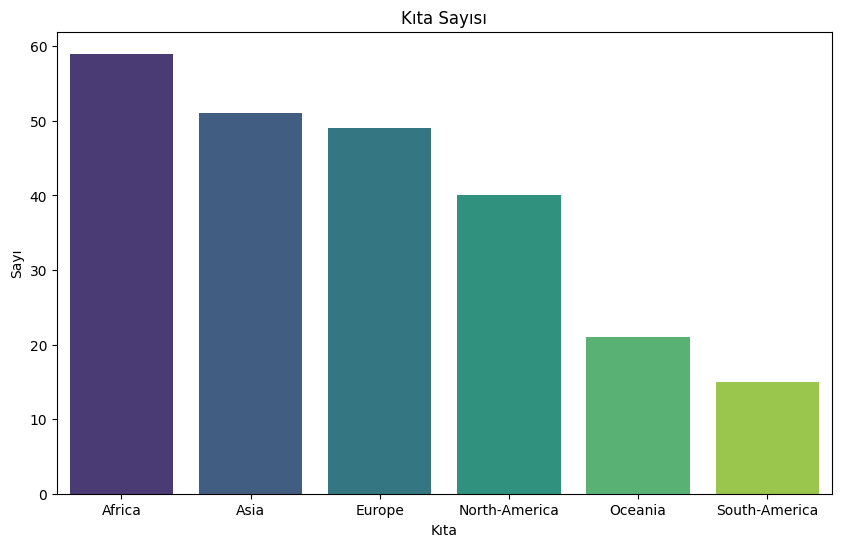

In [64]:
# Her bir kıtanın sayısını alma
value_counts = covid19_data['Continent'].value_counts()

# Çubuk grafik oluşturalım
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Kıta Sayısı')
plt.xlabel('Kıta')
plt.ylabel('Sayı')
plt.show()

In [65]:
# Kıtalara göre aktif vaka sayılarını gruplayarak özetleme ve büyükten küçüğe sıralama
grouped_df = covid19_data.groupby('Continent')['Cases_Active'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Cases_Active', ascending=False)

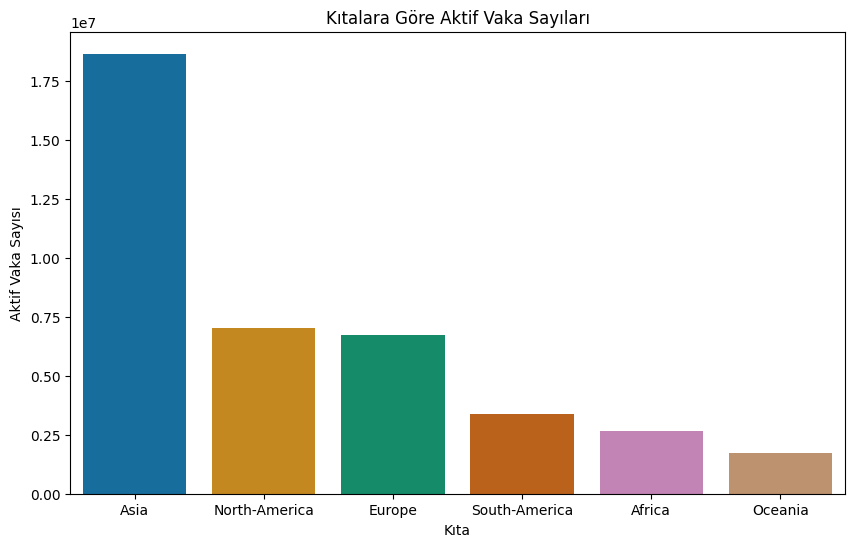

In [66]:
# Kıtalara göre aktif vaka sayıları
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Cases_Active', data=sorted_df, palette='colorblind')
plt.title('Kıtalara Göre Aktif Vaka Sayıları')
plt.xlabel('Kıta')
plt.ylabel('Aktif Vaka Sayısı')
plt.show()

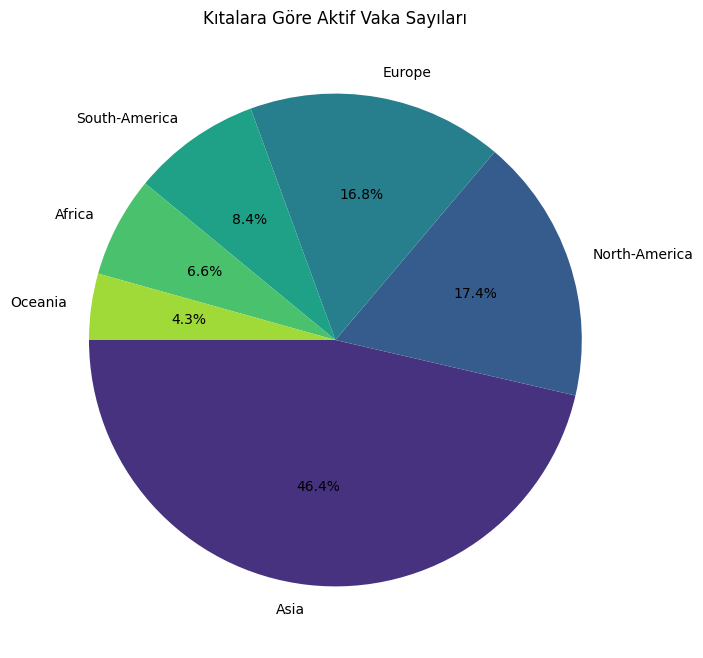

In [67]:
# Pasta grafiği oluşturma
# labels parametresiyle kıtaları, 
# autopct parametresiyle yüzdelik değerleri, 
# startangle parametresiyle pasta diliminin başlangıç açısını, 
# colors parametresiyle renk paleti belirlendi

plt.figure(figsize=(8, 8))
plt.pie(sorted_df['Cases_Active'], labels=sorted_df['Continent'], autopct='%1.1f%%', startangle=180, colors=sns.color_palette('viridis'))
plt.title('Kıtalara Göre Aktif Vaka Sayıları')
plt.show()

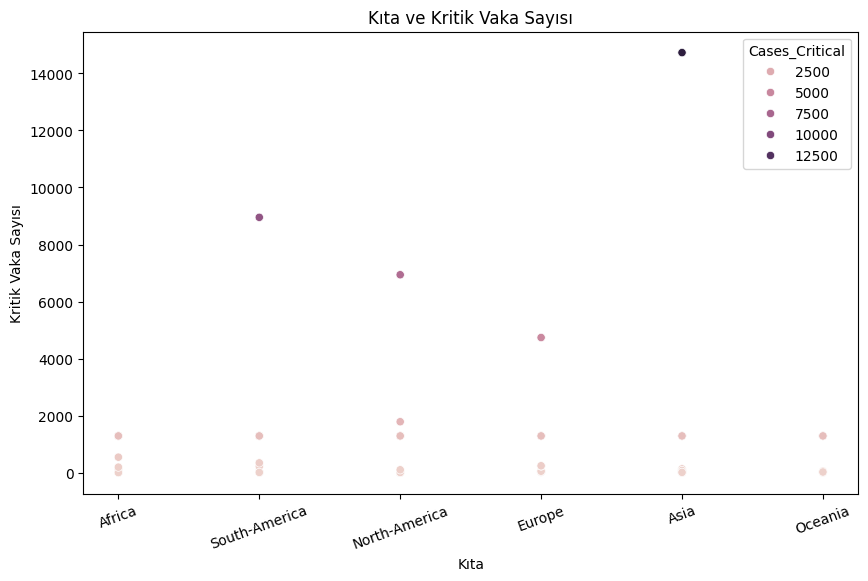

In [68]:
# Scatter plot (Dağılım grafiği) kullanarak kıtalara göre kritik vaka sayıları
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Continent', y='Cases_Critical', data=covid19_data, hue='Cases_Critical')
plt.title('Kıta ve Kritik Vaka Sayısı')
plt.xlabel('Kıta')
plt.ylabel('Kritik Vaka Sayısı')
plt.xticks(rotation=20)  # Eksen etiketlerini döndürmek için
plt.show()

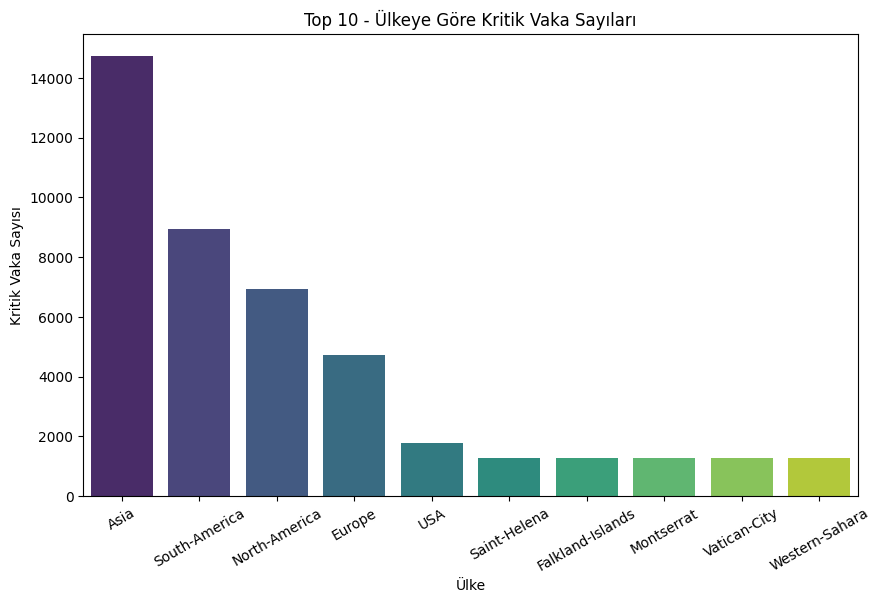

In [69]:
# nlargest fonksiyonu kullanılarak "Cases_Critical" sütununa göre 
# en büyük 10 değeri içeren top_10_countries veri çerçevesi.
top_10_countries = covid19_data.nlargest(10, 'Cases_Critical')

# Çubuk grafiği ile ülkelere göre ölen hasta sayıları
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Cases_Critical', data=top_10_countries, palette='viridis')
plt.title('Top 10 - Ülkeye Göre Kritik Vaka Sayıları')
plt.xlabel('Ülke')
plt.ylabel('Kritik Vaka Sayısı')
plt.xticks(rotation=30)
plt.show()

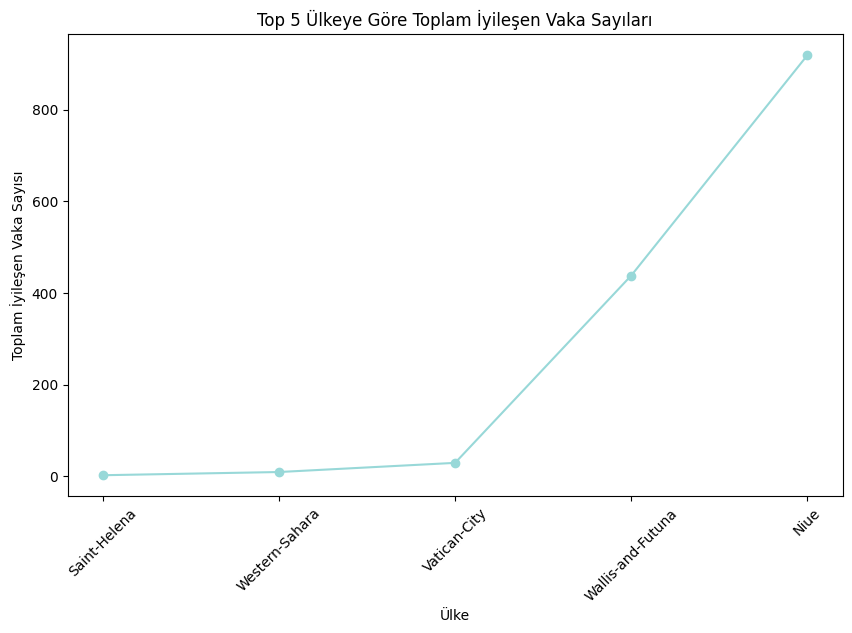

In [70]:
# En küçük 5 ülkeyi seç
top_5_countries = covid19_data.nsmallest(5, 'Cases_Recovered')

# Çizgi grafiği oluştur
plt.figure(figsize=(10, 6))
plt.plot(top_5_countries['Country'], top_5_countries['Cases_Recovered'], marker='o', linestyle='-', color='#98D8D8')
plt.title('Top 5 Ülkeye Göre Toplam İyileşen Vaka Sayıları')
plt.xlabel('Ülke')
plt.ylabel('Toplam İyileşen Vaka Sayısı')
plt.xticks(rotation=45)
plt.show()

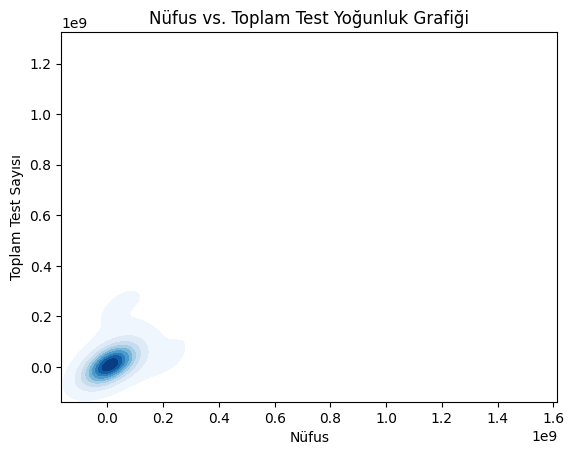

In [71]:
#Yoğunluk grafiği, iki değişken arasındaki dağılımı gösterir.

# Yoğunluk grafiği
sns.kdeplot(data=covid19_data, x='Population', y='Total_Tests', cmap="Blues", fill=True)
plt.title('Nüfus vs. Toplam Test Yoğunluk Grafiği')
plt.xlabel('Nüfus')
plt.ylabel('Toplam Test Sayısı')
plt.show()

In [72]:
# Belirli ülkeleri seçmek
selected_countries = ['Turkey', 'Germany', 'USA', 'China', 'Tajikistan', 'Vatican-City']
df = covid19_data[covid19_data['Country'].isin(selected_countries)].copy()

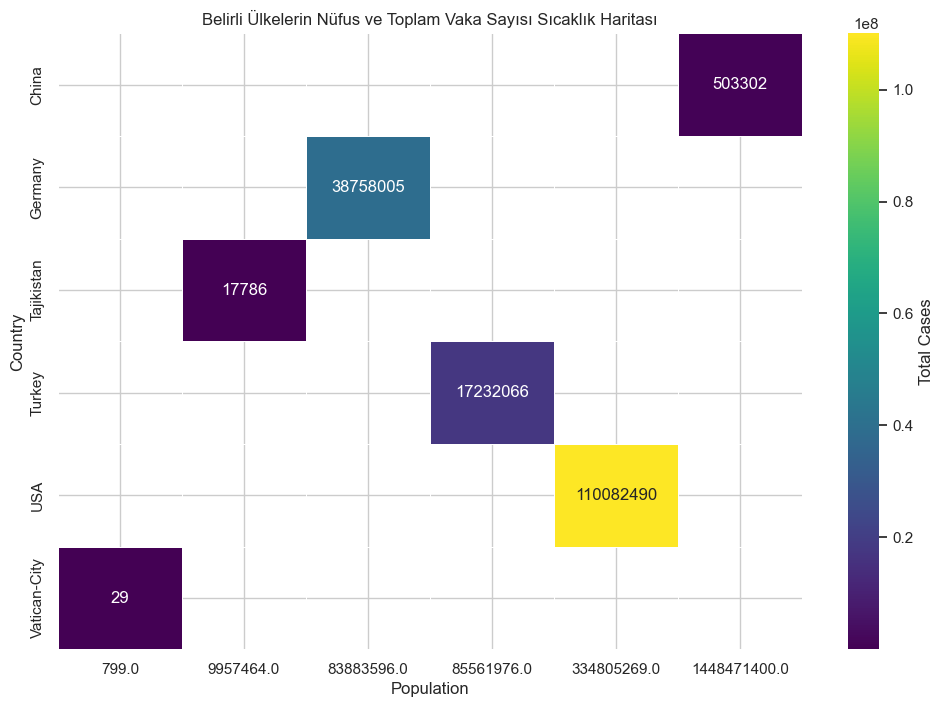

In [73]:
# Sıcaklık haritası çizimi
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(df.pivot_table(values='Total_Cases', index='Country', columns='Population'),
                      cmap="viridis", annot=True, fmt=".0f", linewidths=.5)

# Renk barının (skalasının) etiketi
heatmap.collections[0].colorbar.set_label("Total Cases")

plt.title('Belirli Ülkelerin Nüfus ve Toplam Vaka Sayısı Sıcaklık Haritası')
plt.show()

In [75]:
# Kıtlara göre iyileşen vakaların toplamı
grouped_df = covid19_data.groupby('Continent')['Cases_Recovered'].sum().reset_index()

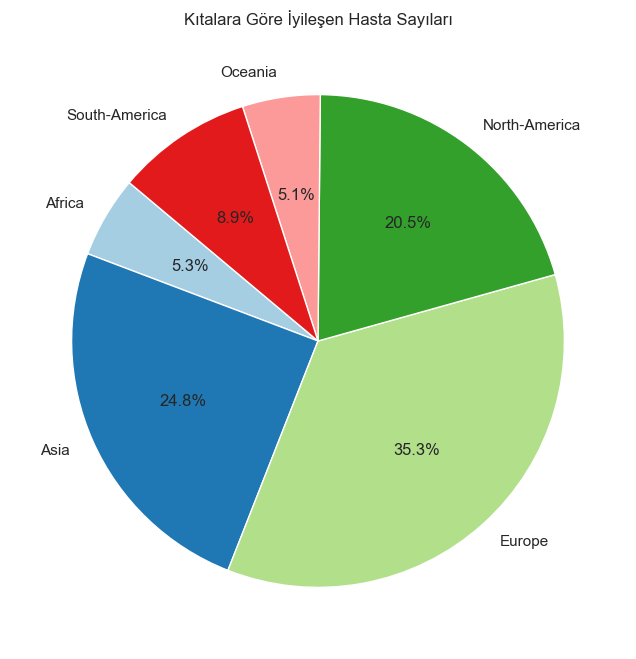

In [76]:
plt.figure(figsize=(8, 8))
plt.pie(grouped_df['Cases_Recovered'], labels=grouped_df['Continent'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Kıtalara Göre İyileşen Hasta Sayıları')
plt.show()

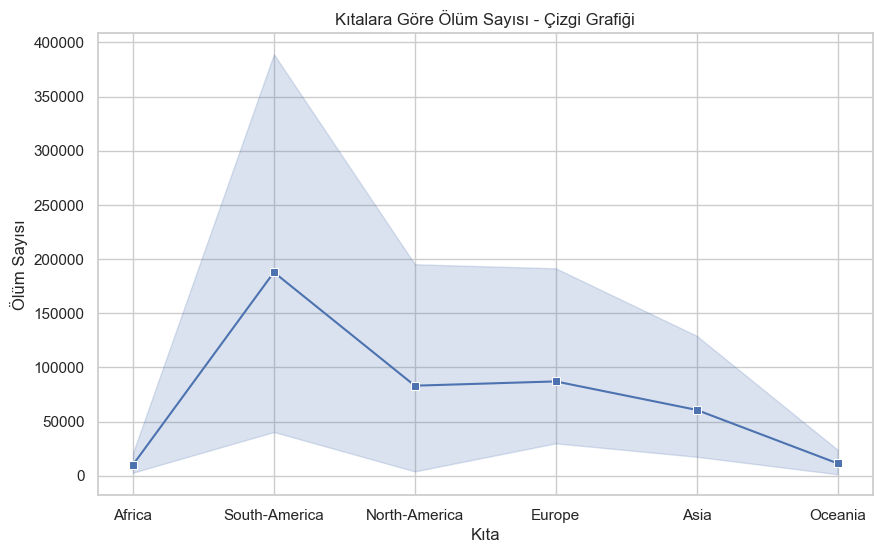

In [77]:
#çizgi grafiği kullanarak kıtlara göre ölen hasta sayısı
plt.figure(figsize=(10, 6))
sns.lineplot(x='Continent', y='Total_Deaths', data=covid19_data, marker='s')

plt.title('Kıtalara Göre Ölüm Sayısı - Çizgi Grafiği')
plt.xlabel('Kıta')
plt.ylabel('Ölüm Sayısı')
plt.show()

#Eğer bu gölgelemeyi kaldırmak istiyorsanız, 
# ci=None (güven aralığı olmadığı anlamına gelir)

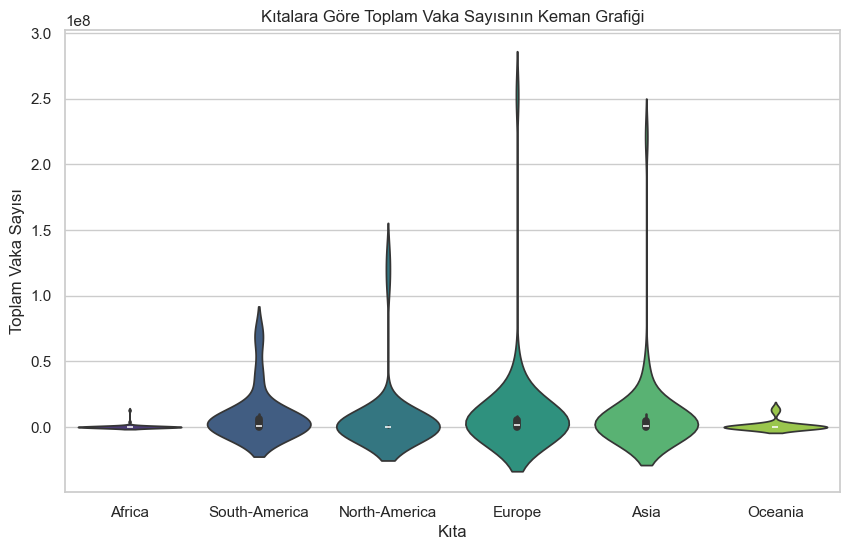

In [78]:
# Keman grafiği ile kıtalara göre toplam vaka sayısı
plt.figure(figsize=(10, 6)) 
sns.violinplot(x='Continent', y='Total_Cases', data=covid19_data, palette='viridis')

plt.title('Kıtalara Göre Toplam Vaka Sayısının Keman Grafiği')
plt.xlabel('Kıta')
plt.ylabel('Toplam Vaka Sayısı')
plt.show()